LAB 01
29/08/2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

E1. Task 

In the previous example there are 2 new functions (cv2.waitKey() and cv2.destroyAllWindows()).

Search for their syntax and parameters, then explain their utility! Also analyze the syntax / parameters for the following functions: cv2.namedWindow() and cv2.destroyWindow().

In [4]:
cv2.waitKey(1)
# Hàm này dùng để dừng chương trình cho đến khi một phím được nhấn hoặc hết thời gian chờ. 
# Nếu không có phím nào được nhấn trong khoảng thời gian này, hàm trả về -1

-1

In [6]:
cv2.destroyAllWindows()
# Hàm này đóng tất cả các cửa sổ do OpenCV tạo ra.

In [ ]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\1.jpg'
img = plt.imread(image_path)

cv2.namedWindow("Image Window", cv2.WINDOW_NORMAL)
# Hàm này tạo cửa sổ hiển thị ảnh với tên và thuộc tính tùy chọn.

cv2.imshow("Image Window", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\1.jpg'
img = plt.imread(image_path)

cv2.namedWindow("Image Window", cv2.WINDOW_NORMAL)

cv2.imshow("Image Window", img)

cv2.waitKey(0)
cv2.destroyWindow("Image Window")
# Hàm này dùng để đóng một cửa sổ cụ thể.

E2. Application

Use the alpha-channel from the image Moustache.png to put the moustache on top of the nose-lip region on the face in trump.jpg ! 

Try to change the code slightly so the original skin region in the nose-lip area is partially visible through the moustache! Use the transparency characteristic of the alpha channel.

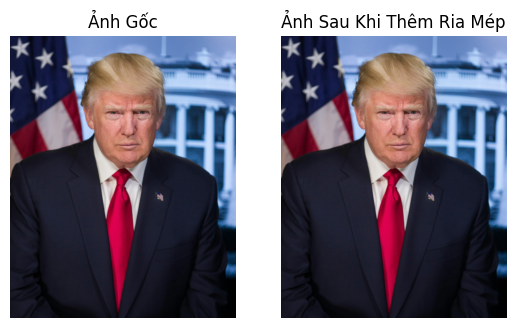

In [37]:
# Đọc ảnh khuôn mặt
trump_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Trump.jpg'
faceImage = plt.imread(trump_path)

# Đọc ảnh ria mép với kênh alpha
moustache_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Moustache.png'
moustache = plt.imread(moustache_path, -1)  # Đọc ảnh với kênh alpha

# Tách kênh màu và kênh alpha từ ảnh ria mép
moustacheBGR = moustache[:, :, 0:3]
moustacheAlpha = moustache[:, :, 3]

# Resize moustacheBGR và moustacheAlpha để khớp với kích thước của roi nếu cần
roi_height, roi_width = 45, 80  # Chiều cao và chiều rộng của roi
moustacheBGR = cv2.resize(moustacheBGR, (roi_width, roi_height))
moustacheAlpha = cv2.resize(moustacheAlpha, (roi_width, roi_height))

# Tạo mask với giá trị từ 0 đến 1
moustacheMask = moustacheAlpha / 255.0
moustacheMask = np.dstack([moustacheMask] * 3)  # Tạo mask 3 kênh

# Lấy vùng mũi-miệng từ ảnh khuôn mặt
roi = faceImage[65:110,20:100]
# Sử dụng mask để tạo hiệu ứng trong suốt một phần
maskedRoi = roi * (1 - moustacheMask)
maskedMoustache = moustacheBGR * moustacheMask
nose_lip_final = cv2.add(maskedRoi.astype(np.uint8), maskedMoustache.astype(np.uint8))

# Gắn kết quả trở lại ảnh gốc
face_with_moustache = faceImage.copy()
face_with_moustache[65:110, 20:100] = nose_lip_final

# Hiển thị ảnh trước và sau khi thêm ria mép
plt.figure()
plt.subplot(121); plt.imshow(faceImage)
plt.title("Ảnh Gốc")
plt.axis("off")
plt.subplot(122); plt.imshow(face_with_moustache)
plt.title("Ảnh Sau Khi Thêm Ria Mép")
plt.axis("off")
plt.show()

E3. Application 

- Read the input color image “shoes.jpg” in variable bgrImg, convert it into a grayscale image grayImg and display it. 

- Resize grayImg to have half pixels per horizontal and vertical coordinates, then display the resized image. Use the function cv2.resize. 

- Display the transposed matrix of grayImg. Use the function cv2.transpose. - Increase by 50 the intensity in grayImg, then decrease the intensity by 50. Display both output images 
and comment on the results. 

- Generate and display the negative of grayImg. 

- Save one of the previous output images in JPEG format with a quality factor of 80.

True

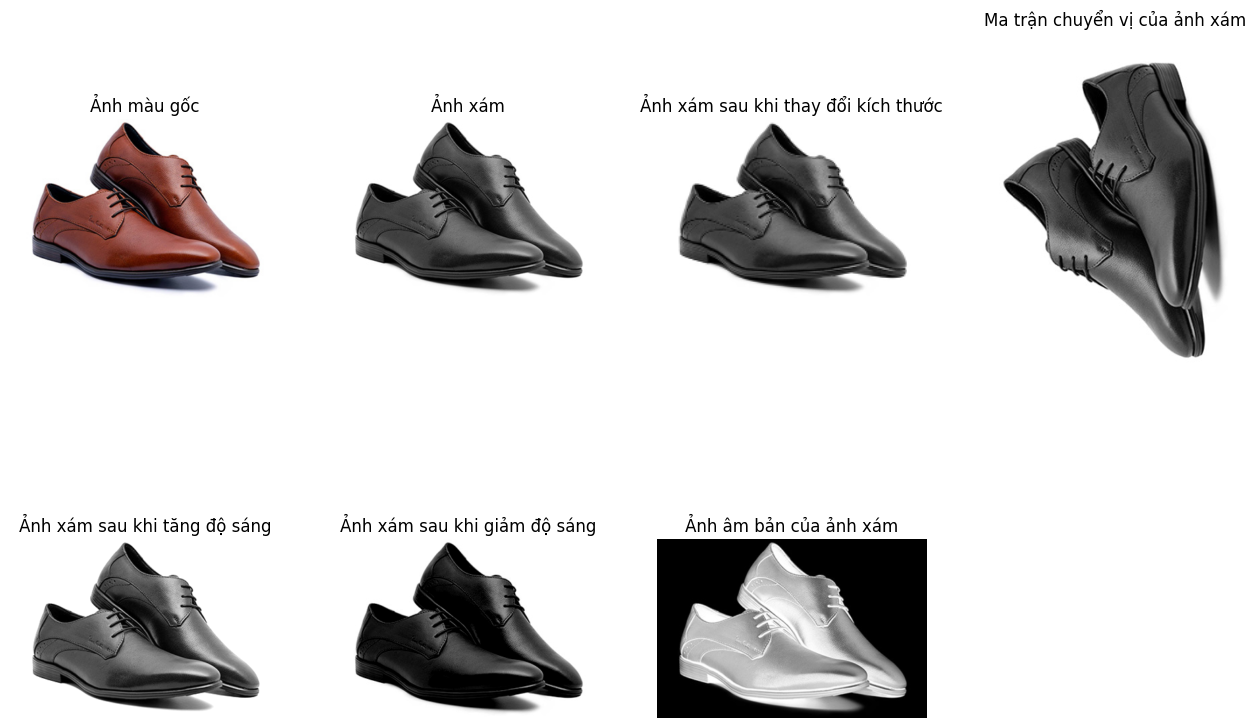

In [50]:
# Đọc ảnh màu và chuyển sang ảnh xám
shoes_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\shoes.jpg'
bgrImg = plt.imread(shoes_path)
grayImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2GRAY)

# Thay đổi kích thước ảnh xám xuống một nửa
grayImg_resized = cv2.resize(grayImg, (grayImg.shape[1] // 2, grayImg.shape[0] // 2))

# Lấy ma trận chuyển vị của ảnh xám
grayImg_transposed = cv2.transpose(grayImg)

# Tăng và giảm độ sáng của ảnh xám
brightImg = cv2.add(grayImg, 50)
darkImg = cv2.subtract(grayImg, 50)
# Nhận xét:
# Khi tăng độ sáng, ảnh trở nên sáng hơn, các chi tiết có thể bị mất.
# Khi giảm độ sáng, ảnh trở nên tối hơn, nhưng chi tiết cũng có thể bị che mờ.

# Tạo ảnh âm bản của ảnh xám
negativeImg = 255 - grayImg

plt.figure(figsize=(16, 10))

plt.subplot(2, 4, 1)
plt.imshow(bgrImg)
plt.title("Ảnh màu gốc")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(grayImg, cmap='gray')
plt.title("Ảnh xám")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(grayImg_resized, cmap='gray')
plt.title("Ảnh xám sau khi thay đổi kích thước")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(grayImg_transposed, cmap='gray')
plt.title("Ma trận chuyển vị của ảnh xám")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(brightImg, cmap='gray')
plt.title("Ảnh xám sau khi tăng độ sáng")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(darkImg, cmap='gray')
plt.title("Ảnh xám sau khi giảm độ sáng")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(negativeImg, cmap='gray')
plt.title("Ảnh âm bản của ảnh xám")
plt.axis("off")

# Lưu một trong các ảnh đầu ra với chất lượng 80
cv2.imwrite("grayImg_resized.jpg", grayImg_resized, [cv2.IMWRITE_JPEG_QUALITY, 80])

E4. Application

Imagine building a visual search engine for shoes in an online store where people can search for shoes by color. Every item in that store will be tagged with the dominant color(s). In this application, you will identify the dominant color using the hue component in a photo and the image histogram. 

- import libraries cv2, matplotlib, and numpy 

- read the color image “shoes.jpg” in bgrImage and display it

- convert the image to HSV color space using the cvtColor function and split it into H, S and V channels 

- remove all background pixels with white / light gray values from the Hue array. This can be easily done 
by not considering all pixels below a certain saturation level. Use the numpy array method flatten to 
transform the foreground significant pixels in the Hue array into a vector 

- display the histogram of the Hue vector and identify the dominant color in the original image. Justify your 
choice! 

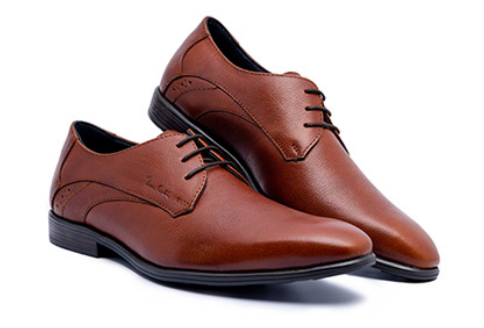

(265, 400)
(48927,)


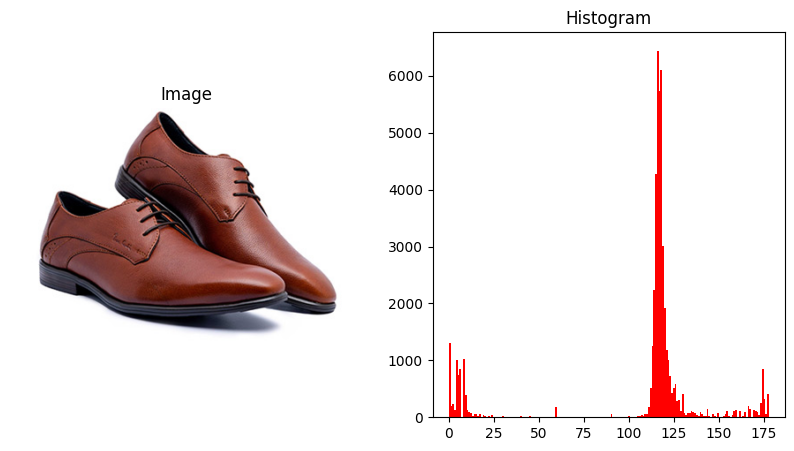

In [28]:
# Cấu hình hiển thị đồ họa trong matplotlib
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'bilinear'

shoes_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\shoes.jpg'
bgrImage = plt.imread(shoes_path)

# Hiển thị ảnh gốc
plt.figure(figsize=(6,4))
plt.imshow(bgrImage)
plt.axis('off')
plt.show()

# Chuyển ảnh từ BGR sang HSV
hsvImage = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2HSV)

# Tách các kênh H, S, V
H, S, V = cv2.split(hsvImage)

# Kiểm tra kích thước của kênh Hue
print(H.shape)

# Loại bỏ các pixel nền có giá trị trắng/xám sáng bằng cách sử dụng mức độ bão hòa (S > 10)
H_array = H[S > 10].flatten()

# Kiểm tra kích thước của mảng Hue sau khi loại bỏ nền
print(H_array.shape)

# Hiển thị ảnh gốc và histogram của mảng Hue
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(bgrImage)
plt.title("Image")
plt.axis('off')

plt.subplot(122)
plt.hist(H_array, bins=180, color='r')
plt.title("Histogram")
plt.show()

E5. Application

Apply histogram equalization for the grayscale image “rose.jpg” and compare the images and their histograms  before  and  after  the  grayscale  transformation.  The  original  image  is quite  dark,  so  the  result should be  an  image  with improved  contrast (with gray shades  covering the  entire  range from 0-black  to 
255-white). 

- import libraries cv2, matplotlib, matplotlib.pyplot, and numpy 

- read the image in grayscale format 

im = cv2.imread("rose.jpg", cv2.IMREAD_GRAYSCALE) 

- apply histogram equalization and save the output image as imOut 

imOut = cv2.equalizeHist(im) 

- display the original image and the image with enhanced contrast, in the same figure with subplot, as shown in Figure 5. Then, display their histograms in the same figure, using subplot. Use the numpy method ravel() that reshapes the original image matrix into a flatten one-dimensional array

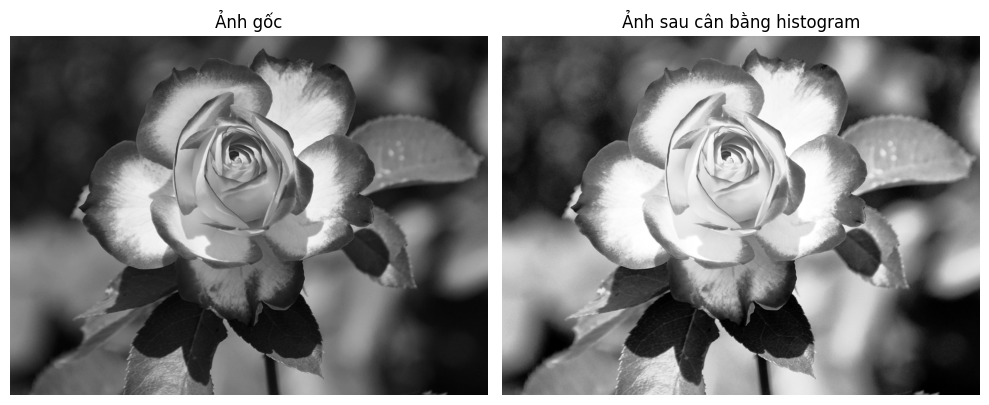

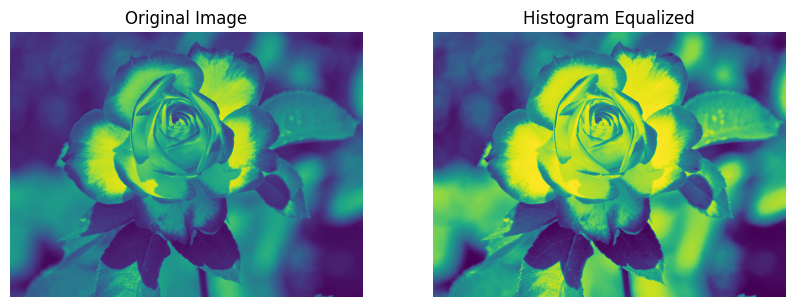

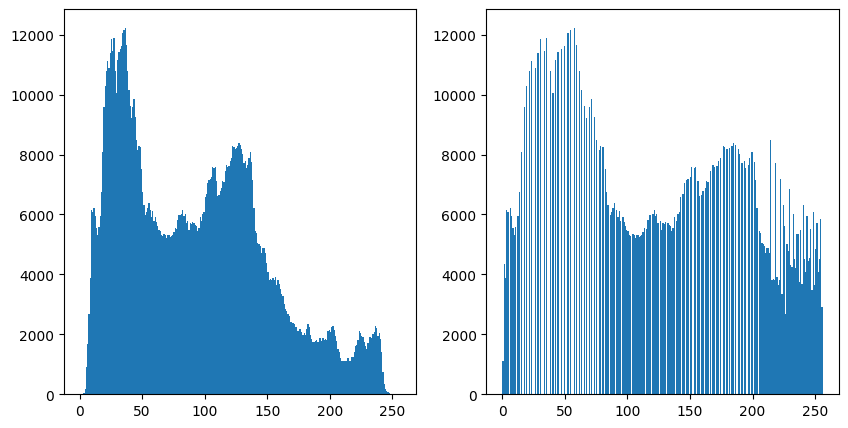

In [27]:
im = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Rose.jpg')
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

imOut = cv2.equalizeHist(im) 

# Hiển thị ảnh gốc và ảnh sau cân bằng histogram
plt.figure(figsize=(10, 5))
    
# Ảnh gốc
ax = plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.set_title("Ảnh gốc")
ax.axis('off')
    
# Ảnh sau cân bằng histogram
ax = plt.subplot(1, 2, 2)
plt.imshow(imOut, cmap='gray', vmin=0, vmax=255)
ax.set_title("Ảnh sau cân bằng histogram")
ax.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5)) 
ax = plt.subplot(1,2,1); plt.imshow(im, vmin=0, vmax=255); 
ax.set_title("Original Image");ax.axis('off') 
ax = plt.subplot(1,2,2); plt.imshow(imOut, vmin=0, vmax=255); 
ax.set_title("Histogram Equalized") 
ax.axis('off') 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.hist(im.ravel(),256,[0,256]); 
plt.subplot(1,2,2); plt.hist(imOut.ravel(),256,[0,256]); 
plt.show()

E6. Application

Apply histogram equalization for a color image! Do not simply perform histogram equalization for each channel separately. When each color channel is non-linearly transformed independently, the results are completely new and unrelated colors. A better solution is to transform the images to a space like HSV color space, where colors/hue/tint is separated from the intensity, and then perform histogram equalization. 

Perform the following steps: 

- read the image “flowers.jpg” 

- tranform the image to HSV color space 

- perform histogram equalization only on the V channel 

- transform the image back to RGB color space 

- convert the equalized HSV image back to BGR format 

- display both images, original and output, in the same figure, using subplot 

- display both histograms, original V channel and equalized V channel, in the same figure, using subplot 

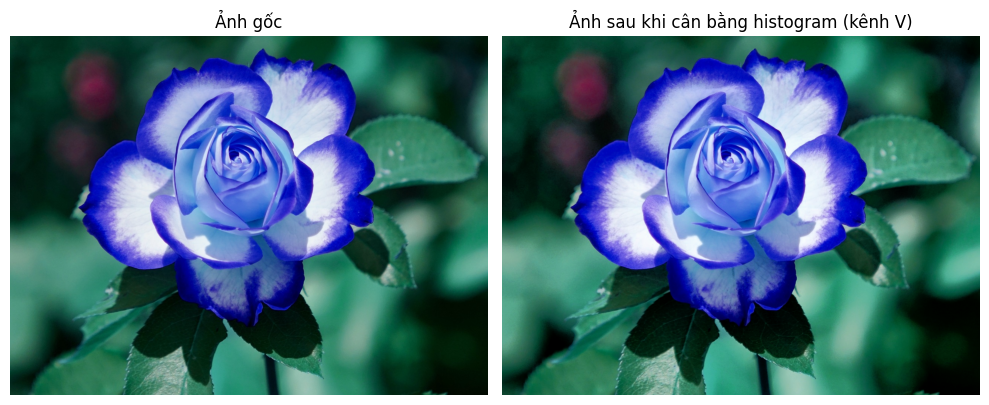

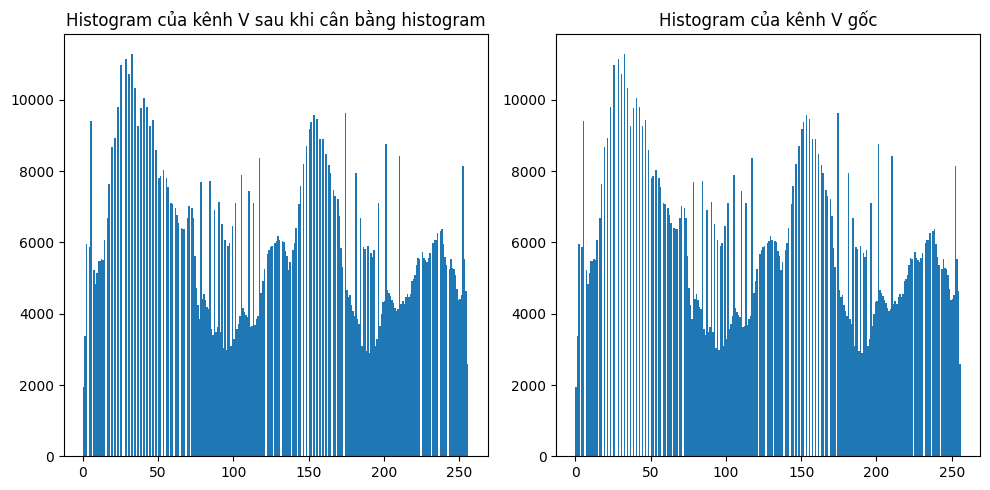

In [25]:
# Đọc ảnh
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Rose.jpg')

# Chuyển đổi ảnh sang không gian màu HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Thực hiện cân bằng histogram chỉ trên kênh V (giá trị sáng)
image_hsv[:, :, 2] = cv2.equalizeHist(image_hsv[:, :, 2])

# Chuyển đổi ảnh lại sang không gian màu BGR
image_output = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

# Hiển thị cả ảnh gốc và ảnh sau khi xử lý
plt.figure(figsize=(10, 5))

# Ảnh gốc
ax = plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị
ax.set_title("Ảnh gốc")
ax.axis('off')

# Ảnh sau khi cân bằng histogram kênh V
ax = plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị
ax.set_title("Ảnh sau khi cân bằng histogram (kênh V)")
ax.axis('off')

plt.tight_layout()
plt.show()

# Hiển thị histogram của kênh V gốc và kênh V sau khi cân bằng histogram
plt.figure(figsize=(10, 5))

# Histogram của kênh V gốc
ax = plt.subplot(1, 2, 1)
plt.hist(image_hsv[:, :, 2].ravel(), bins=256, range=[0, 256])
ax.set_title("Histogram của kênh V sau khi cân bằng histogram")

# Histogram của kênh V sau khi cân bằng
ax = plt.subplot(1, 2, 2)
plt.hist(image_hsv[:, :, 2].ravel(), bins=256, range=[0, 256])
ax.set_title("Histogram của kênh V gốc")

plt.tight_layout()
plt.show()

E7. Application

Apply  the  adaptive  histogram  equalization  algorithm  called  CLAHE  to  the  original  image “night_sky.jpg” and compare the result with usual histogram equalization. Perform the following steps:

- read the color image “night_sky.jpg”

- convert it to HSV color space and save it in hsvImg. Make a copy of hsvImg and denote it hsvImgCopy, using the method copy() provided by NumPy arrays.  

- perform histogram equalization only on the V channel in hsvImg, convert back to BGR format and store the image with normal equalized histogram in normalEqImg 

- create a CLAHE object using clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) 

-  use  the  apply()  method  of  the  clahe  object  to  perform  adaptive  histogram  equalization  for  the  V channel of the hsvImgCopy (hsvImgCopy[:,:,0] represents the Hue channel, 

hsvImgCopy[:,:,1] is the Saturation channel) 

imhsvCLAHE[:,:,2] = clahe.apply(hsvImgCopy[:,:,2]) 

- convert also hsvImgCopy to BGR format 

- display in the same figure (using subplot) the original image, the normal equalized image, and the image adaptively equalized with CLAHE. The result should resemble Figure 7, where the final image at the right is clearly more faithful to the original intent of the photographer. 


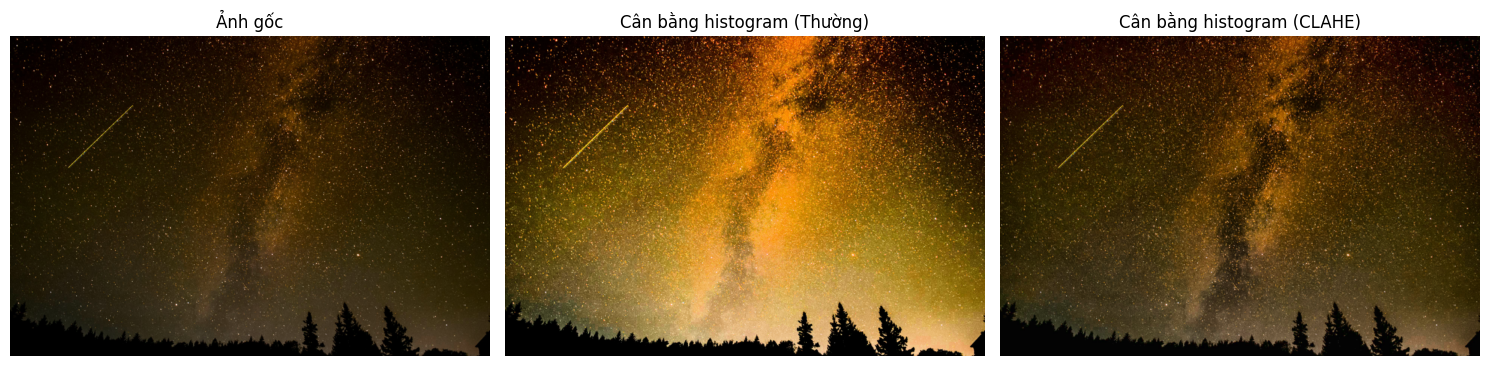

In [30]:
# Đọc ảnh
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\nightSky.jpg')

# Chuyển đổi ảnh sang không gian màu HSV
hsvImg = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tạo một bản sao của hsvImg
hsvImgCopy = hsvImg.copy()

# Thực hiện cân bằng histogram thông thường trên kênh V của hsvImg
hsvImg[:, :, 2] = cv2.equalizeHist(hsvImg[:, :, 2])

# Chuyển đổi ảnh đã cân bằng histogram về lại không gian BGR
normalEqImg = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)

# Tạo đối tượng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Áp dụng CLAHE cho kênh V của hsvImgCopy
hsvImgCopy[:, :, 2] = clahe.apply(hsvImgCopy[:, :, 2])

# Chuyển đổi ảnh đã áp dụng CLAHE sang không gian BGR
imhsvCLAHE = cv2.cvtColor(hsvImgCopy, cv2.COLOR_HSV2BGR)

# Hiển thị ảnh gốc, ảnh đã cân bằng histogram thông thường và ảnh đã áp dụng CLAHE
plt.figure(figsize=(15, 5))

# Ảnh gốc
ax = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị
ax.set_title("Ảnh gốc")
ax.axis('off')

# Ảnh sau khi cân bằng histogram thông thường
ax = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(normalEqImg, cv2.COLOR_BGR2RGB))
ax.set_title("Cân bằng histogram (Thường)")
ax.axis('off')

# Ảnh sau khi áp dụng CLAHE
ax = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imhsvCLAHE, cv2.COLOR_BGR2RGB))
ax.set_title("Cân bằng histogram (CLAHE)")
ax.axis('off')

plt.tight_layout()
plt.show()


E8. Task 

Knowing  the  meaning  of the  histogram,  search  for the  definitions  of  Probability  Mass  Function (PMF) and Cumulative Distribution Function (CDF). Write their definitions in your report. 

    1. Hàm khối xác suất (PMF):
Hàm khối xác suất (PMF) là một hàm cho biết xác suất của một biến ngẫu nhiên rời rạc nhận một giá trị cụ thể. PMF chỉ được định nghĩa cho các biến ngẫu nhiên rời rạc và gán xác suất cho từng kết quả có thể xảy ra trong không gian mẫu.

Về mặt toán học, với một biến ngẫu nhiên rời rạc X, PMF được cho bởi:

$$
P(X = x) = p(x)
$$

Trong đó, p(x) là xác suất mà biến ngẫu nhiên X nhận giá trị x. Tổng các xác suất cho tất cả các giá trị có thể của X phải bằng 1:

$$
\sum_{x} p(x) = 1
$$

Trong ngữ cảnh của biểu đồ tần suất (histogram), PMF có thể được hình dung qua chiều cao của các thanh, trong đó mỗi thanh biểu thị xác suất của một kết quả cụ thể.

    2. Hàm phân phối tích lũy (CDF):
Hàm phân phối tích lũy (CDF) của một biến ngẫu nhiên là một hàm cho biết xác suất mà biến ngẫu nhiên đó có giá trị nhỏ hơn hoặc bằng một giá trị cụ thể. CDF cung cấp xác suất tích lũy cho tất cả các giá trị nhỏ hơn hoặc bằng một giá trị 
𝑥
x nhất định.

Về mặt toán học, CDF F(x) được định nghĩa là:

$$
F(x) = P(X \leq x)
$$

Điều này có nghĩa là CDF tại bất kỳ điểm nào x cho biết xác suất mà biến ngẫu nhiên X có giá trị nhỏ hơn hoặc bằng x. CDF luôn là một hàm không giảm, và đối với một biến ngẫu nhiên liên tục, nó thường làm mịn phân phối. Đối với một biến ngẫu nhiên rời rạc, CDF có thể tăng theo các bước, với mỗi bước ứng với một giá trị có thể của biến ngẫu nhiên.